<a href="https://colab.research.google.com/github/lOmarMisbahl/PatternRecognition-Sheets/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from copy import deepcopy
from sklearn.metrics.pairwise import rbf_kernel as rbf
from sklearn.neighbors import NearestNeighbors as nn
from scipy.sparse.linalg import eigs as sciEigs

In [ ]:
Data = np.array([[2,4],[3,3],[3,4],[5,4],[5,6],[5,8],[6,4],[6,5],[6,7],[7,3],[7,4],[8,2],[9,4],[10,6],[10,7],[10,8],[11,5],[11,8],[12,7],[13,6],[13,7],[14,6],[15,4],[15,5]])

In [ ]:
def NormalizedCut(Data, NumOfClusters, Mode, Gamma=1.0, NumOfNeighbors=1):
    if(Mode == 'rbf'):
        similarityMatrix = rbf(Data,Data,Gamma)
    elif(Mode == 'knn'):
        nearest_neigbhor = nn(n_neighbors=NumOfNeighbors)
        nearest_neigbhor.fit(Data)
        similarityMatrix = nearest_neigbhor.kneighbors_graph(Data, mode='connectivity').toarray()
        
    degreeMmatrix = np.diag(np.sum(similarityMatrix, axis=1))
    laplacianMatrix = degreeMmatrix - similarityMatrix
    nomalizedAsymmertircLaplacianMatrix = np.dot(np.linalg.inv(degreeMmatrix),laplacianMatrix) 
    values,vectors = np.linalg.eig(nomalizedAsymmertircLaplacianMatrix)
    idx = np.real(values).argsort()[:NumOfClusters]
    vectors = np.real(vectors[:,idx])
    Normalization = np.linalg.norm(vectors, axis=1)
    NormalizedVectors = (vectors.T / Normalization).T
    return NormalizedVectors,np.real(values)

In [ ]:
Ymatrices = []
for GammaValues in [0.01,0.1,1.0,10.0]:
    Y,values = NormalizedCut(Data, NumOfClusters=3, Mode='rbf', Gamma=GammaValues)
    Ymatrices.append(Y)
    values = values[values.argsort()[:3]]
    print("\nFor Gamma = ", GammaValues)
    print("\nEigen Vectors = \n",Y,"\nEigen Values = \n",values)


For Gamma =  0.01

Eigen Vectors = 
 [[ 0.48469361  0.81568545  0.31579956]
 [ 0.4717949   0.71134742  0.52095529]
 [ 0.54172725  0.78895113  0.28997879]
 [ 0.68814602  0.67457621  0.2672115 ]
 [ 0.65288784  0.57097837 -0.49771595]
 [ 0.43340636  0.33331067 -0.837295  ]
 [ 0.77433842  0.56698455  0.28094224]
 [ 0.81537465  0.55389973 -0.16840212]
 [ 0.56117167  0.32210643 -0.76245249]
 [ 0.68145218  0.36221159  0.63594473]
 [ 0.85497805  0.40930615  0.31856085]
 [ 0.53904442  0.17563858  0.82376101]
 [ 0.89159882 -0.03556095  0.45142769]
 [ 0.85143498 -0.34106092 -0.39841677]
 [ 0.66744578 -0.29927091 -0.68187466]
 [ 0.51775544 -0.25641679 -0.81619834]
 [ 0.83253914 -0.51028536  0.21560945]
 [ 0.53690009 -0.40265479 -0.74135512]
 [ 0.66158878 -0.63519584 -0.39853047]
 [ 0.64383592 -0.75386197  0.13102457]
 [ 0.62305035 -0.75475832 -0.20530013]
 [ 0.55227955 -0.78449543  0.28205357]
 [ 0.3745975  -0.59630214  0.71000033]
 [ 0.4245056  -0.69143167  0.58456586]] 
Eigen Values = 
 [-1.110

In [ ]:
def KMeans(Data, NumOfClusters):
    NumberOfData = Data.shape[0]
    NumberOfFeatures = Data.shape[1]     
    Centroids = np.random.randn(NumOfClusters,NumberOfFeatures)
    OldCentroids = np.zeros(Centroids.shape) 
    Clusters = np.zeros(NumberOfData)
    Distances = np.zeros((NumberOfData,NumOfClusters))
    for i in range(NumOfClusters):
        Distances[:,i] = np.linalg.norm(Data - Centroids[i], axis=1)
        Clusters = np.argmin(Distances, axis = 1)
        OldCentroids = deepcopy(Centroids)
        for i in range(NumOfClusters):
            Centroids[i] = np.mean(Data[Clusters == i], axis=0)
        
    return Centroids,Clusters

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


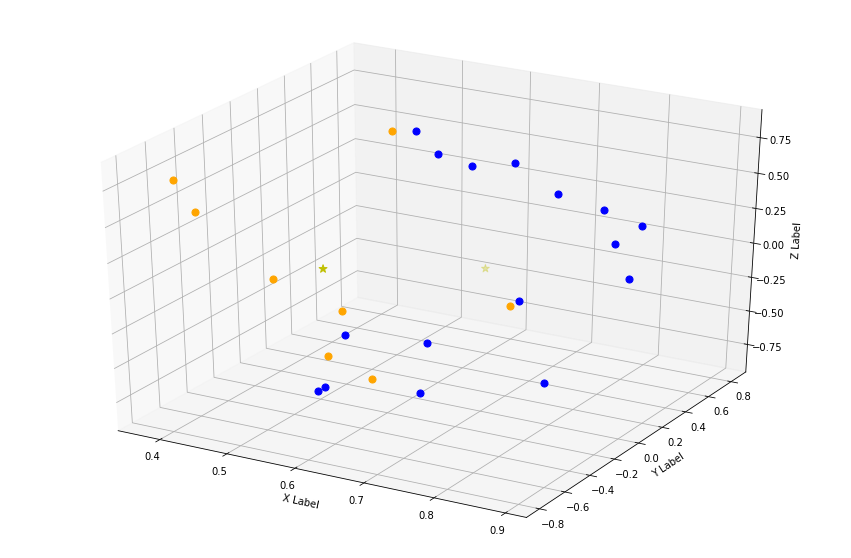

In [ ]:
Y = Ymatrices[0]
Centroids, Clusters = kmeans(Y, NumOfClusters=3)
colors=['orange', 'blue', 'green']
fig = plt.figure();
plt.gcf().set_size_inches(15,10);
ax = fig.add_subplot(111, projection='3d');
for i in range(Y.shape[0]):
    ax.scatter(Y[i,0],Y[i,1],Y[i,2], s=50, color = colors[Clusters[i]]);
ax.scatter(Centroids[:,0], Centroids[:,1],Centroids[:,2], marker='*', c='y',s=70)
ax.set_xlabel('X Label');
ax.set_ylabel('Y Label');
ax.set_zlabel('Z Label');

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


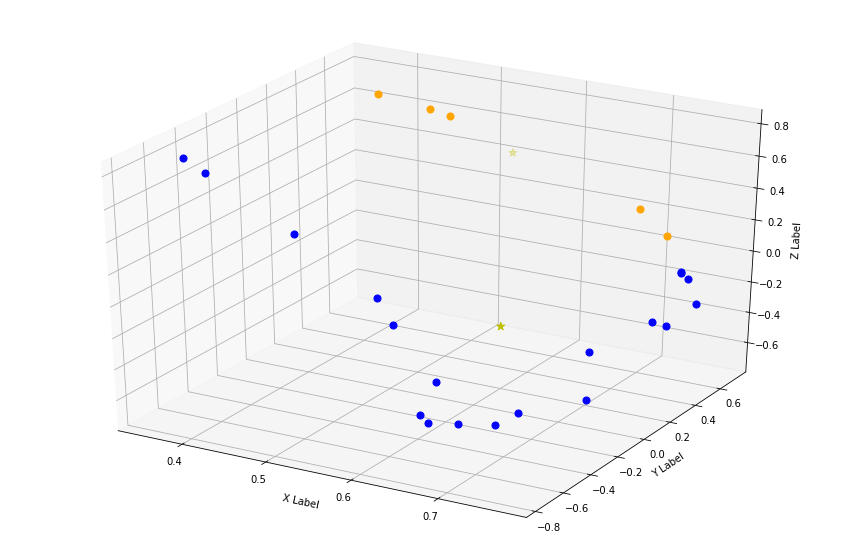

In [ ]:
Y = Ymatrices[1]
Centroids, Clusters = kmeans(Y, NumOfClusters=3)
colors=['orange', 'blue', 'green']
fig = plt.figure();
plt.gcf().set_size_inches(15,10);
ax = fig.add_subplot(111, projection='3d');
for i in range(Y.shape[0]):
    ax.scatter(Y[i,0],Y[i,1],Y[i,2], s=50, color = colors[Clusters[i]]);
ax.scatter(Centroids[:,0], Centroids[:,1],Centroids[:,2], marker='*', c='y',s=70)
ax.set_xlabel('X Label');
ax.set_ylabel('Y Label');
ax.set_zlabel('Z Label');

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


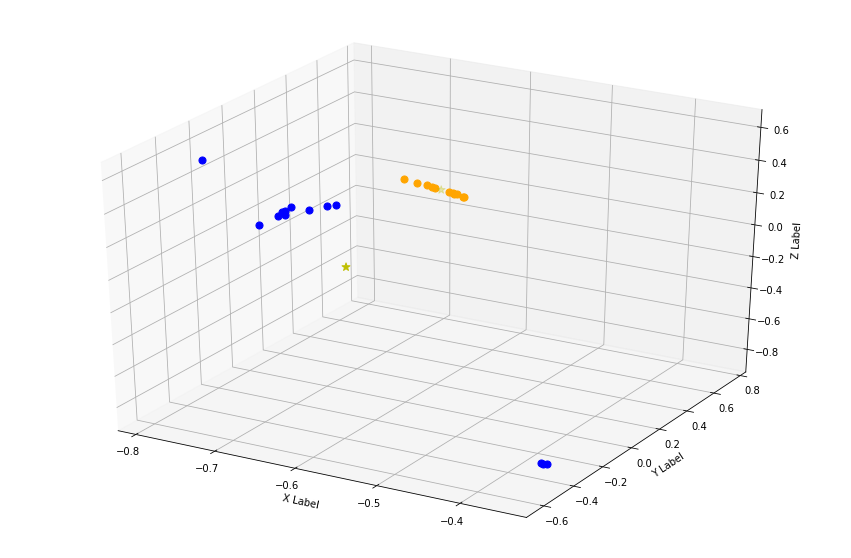

In [ ]:
Y = Ymatrices[2]
Centroids, Clusters = kmeans(Y, NumOfClusters=3)
colors=['orange', 'blue', 'green']
fig = plt.figure();
plt.gcf().set_size_inches(15,10);
ax = fig.add_subplot(111, projection='3d');
for i in range(Y.shape[0]):
    ax.scatter(Y[i,0],Y[i,1],Y[i,2], s=50, color = colors[Clusters[i]]);
ax.scatter(Centroids[:,0], Centroids[:,1],Centroids[:,2], marker='*', c='y',s=70)
ax.set_xlabel('X Label');
ax.set_ylabel('Y Label');
ax.set_zlabel('Z Label');

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


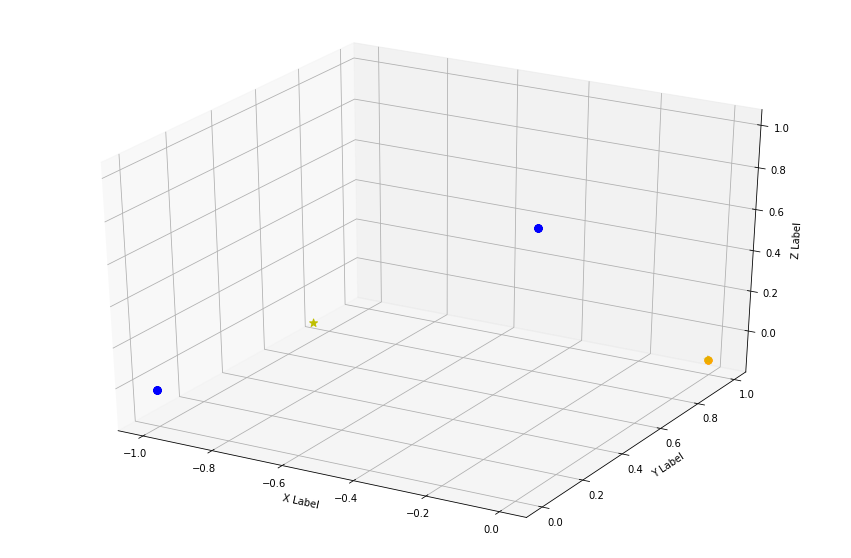

In [ ]:
Y = Ymatrices[3]
Centroids, Clusters = kmeans(Y, NumOfClusters=3)
colors=['orange', 'blue', 'green']
fig = plt.figure();
plt.gcf().set_size_inches(15,10);
ax = fig.add_subplot(111, projection='3d');
for i in range(Y.shape[0]):
    ax.scatter(Y[i,0],Y[i,1],Y[i,2], s=50, color = colors[Clusters[i]]);
ax.scatter(Centroids[:,0], Centroids[:,1],Centroids[:,2], marker='*', c='y',s=70)
ax.set_xlabel('X Label');
ax.set_ylabel('Y Label');
ax.set_zlabel('Z Label');

0.01, 0.1, 1 produces a connected graph, but 10 doesn't.

In [ ]:
Y,values = NormalizedCut(Data, NumOfClusters=3, Mode='knn',NumOfNeighbors=3)
values = values[values.argsort()[:3]]
print("Eigen Vectors = \n",Y,"\nEigen Values = \n",values)

Eigen Vectors = 
 [[ 0.00000000e+00 -1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.00000000e+00  0.00000000e+00]
 [-1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.00000000e+00  0.00000000e+00 -2.56172133e-15]
 [-1.00000000e+00  0.00000000e+00 -2.92913551e-15]
 [-1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.00000000e+00  0.00000000e+00 -4.55663648e-16]
 [-1.00000000e+00  0.00000000e+00 -2.92913551e-15]
 [-1.00000000e+00  0.00000000e+00 -9.11327295e-17]
 [-1.00000000e+00  0.00000000e+00 -9.11327295e-17]
 [-1.00000000e+00  0.00000000e+00 -1.68109231e-15]
 [-1.00000000e+00  0.00000000e+00 -1.54925640e-15]
 [-9.22752146e-01  0.00000000e+00  3.85393924e-01]
 [-8.71498144e-01  0.00000000e+00  4.90398802e-01]
 [-8.42314346e-01  0.00000000e+00  5.38986588e-01]
 [-9.76185315e-01  0.00000000e+00  2.16938312e-01]
 [-8.42314346e-01  0.00000000e+00  5.38986588e-01]
 [-6.39367902e-01  0.00000000e+00  7.68900960e-01]
 [-4.77016271

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


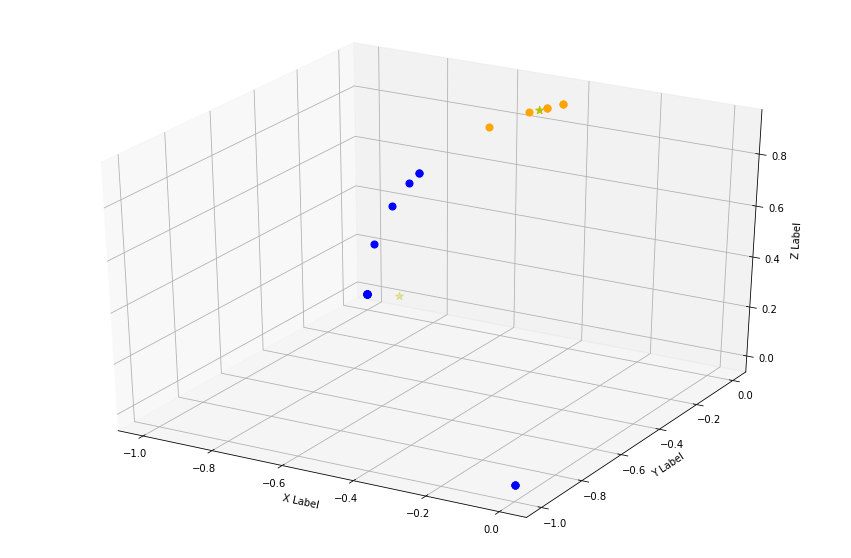

In [ ]:
Centroids, Clusters = KMeans(Y, NumOfClusters=3)
colors=['orange', 'blue', 'green']
fig = plt.figure();
plt.gcf().set_size_inches(15,10);
ax = fig.add_subplot(111, projection='3d');
for i in range(Y.shape[0]):
    ax.scatter(Y[i,0],Y[i,1],Y[i,2], s=50, color = colors[Clusters[i]]);
    
ax.scatter(Centroids[:,0], Centroids[:,1],Centroids[:,2], marker='*', c='y',s=70)
ax.set_xlabel('X Label');
ax.set_ylabel('Y Label');
ax.set_zlabel('Z Label');